# Quantum Computing Workshop – Multi-Qubit Operations

## 1. Multi-Qubit States

- A **single qubit** lives in a 2D complex vector space spanned by  
  $\{|0\rangle, |1\rangle\}$.

- To describe **multiple qubits**, we take the **tensor product** of single-qubit spaces:  
  $$
  \mathcal{H}_2 \otimes \mathcal{H}_2 = \mathcal{H}_4
  $$

- The **two-qubit basis** is:  
  $|00\rangle, |01\rangle, |10\rangle, |11\rangle$

- In vector form:
  - $|00\rangle = [1,0,0,0]^T$  
  - $|01\rangle = [0,1,0,0]^T$  
  - $|10\rangle = [0,0,1,0]^T$  
  - $|11\rangle = [0,0,0,1]^T$

- **Scaling:**  
  - 1 qubit → 2D  
  - 2 qubits → 4D  
  - 3 qubits → 8D  
  - $n$ qubits → $2^n$ dimensions

---


In [5]:
import numpy as np
from numpy import kron
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
aer_sim = AerSimulator()
# Example: create |0> ⊗ |1>
qc = QuantumCircuit(2)
qc.x(1)   
qc.draw('mpl')


NameError: name 'QuantumCircuit' is not defined

In [ ]:
state = Statevector.from_instruction(qc)
for idx, amp in enumerate(state.data):
    print(f"|{idx:02b}>: {amp:.1f}")


|00>: 0.0+0.0j
|01>: 0.0+0.0j
|10>: 1.0+0.0j
|11>: 0.0+0.0j


## 2. Multi-Qubit Gates

- **Single-qubit gates** (X, H, Z, etc.) act on one qubit only.  
- To make qubits interact, we need **multi-qubit gates**.  

### Example: CNOT (Controlled-NOT)

- Control qubit: decides whether to apply NOT (X) to the target.  
- Truth table:  
  - $|00\rangle \to |00\rangle$  
  - $|01\rangle \to |01\rangle$  
  - $|10\rangle \to |11\rangle$  
  - $|11\rangle \to |10\rangle$

- In matrix form (4×4):
$$
\text{CNOT} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$


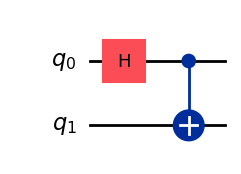

In [ ]:

qc_cnot = QuantumCircuit(2)
qc_cnot.h(0)       
qc_cnot.cx(0, 1)   
qc_cnot.draw('mpl')


|00>: (0.707+0j)
|01>: 0j
|10>: 0j
|11>: (0.707+0j)


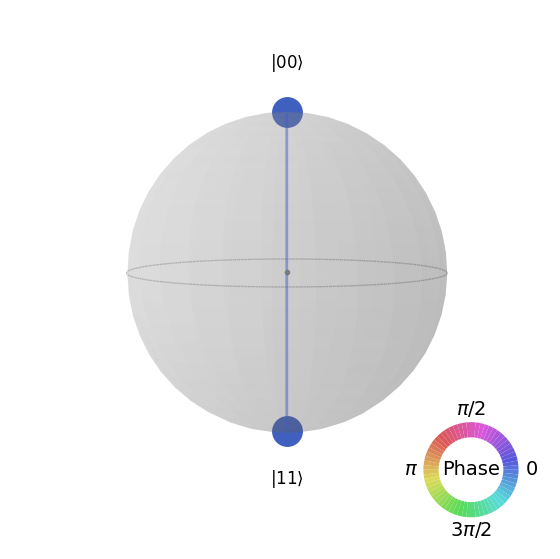

In [ ]:
state_cnot = Statevector.from_instruction(qc_cnot)
for idx, amp in enumerate(state_cnot.data):
    print(f"|{idx:02b}>: {np.round(amp,3)}")
rho=state_cnot
plot_state_qsphere(state_cnot)


## 3. Circuit Diagrams & Gate Sequences

We can build **longer sequences** of gates.  
For example: apply an X to qubit 1, then Hadamard + CNOT.


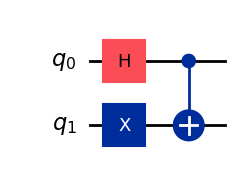

In [ ]:
qc_seq = QuantumCircuit(2)
qc_seq.x(1)
qc_seq.h(0)
qc_seq.cx(0,1)
qc_seq.draw('mpl')


## 4. Measurement & Correlations

Finally, let’s measure the Bell circuit.

- When we measure, we get **random outcomes**.  
- For the Bell state, outcomes are always **correlated**:  
  - About 50% `00`  
  - About 50% `11`  
  - Never `01` or `10`


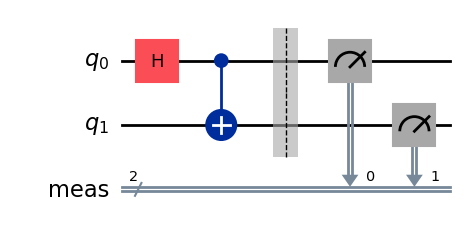

In [ ]:
qc_bell = qc_cnot.copy()
qc_bell.measure_all()
qc_bell.draw('mpl')


In [3]:
aer_sim = AerSimulator()
tqc = transpile(qc_bell, aer_sim)
result = aer_sim.run(tqc, shots=1024).result()
counts = result.get_counts()

print("Measurement results:", counts)
plot_histogram(counts)


NameError: name 'transpile' is not defined

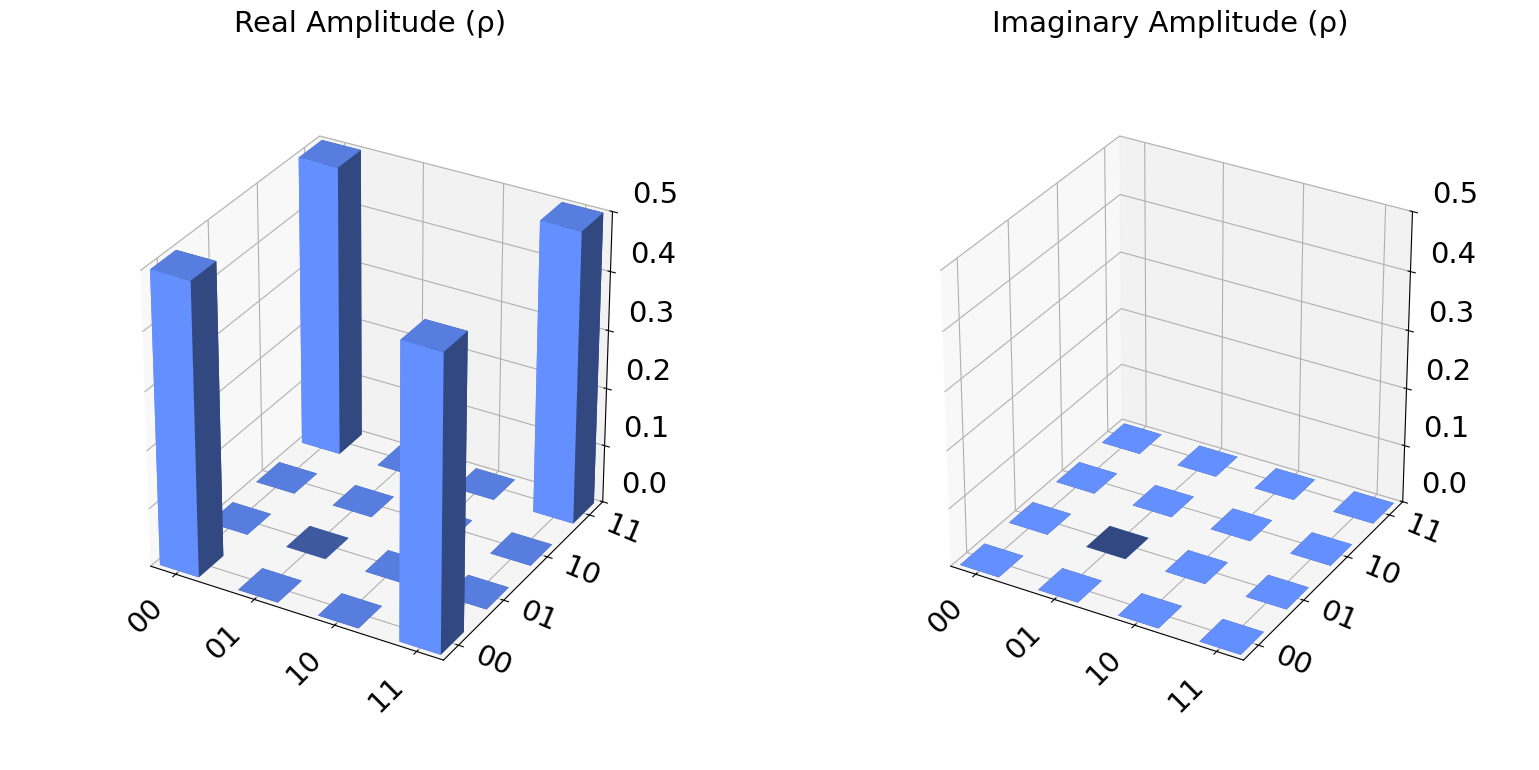

In [ ]:
from qiskit.visualization import plot_state_city, plot_state_hinton, plot_state_qsphere

plot_state_city(rho)  




# ✅ Summary

- Multi-qubit systems are built using **tensor products** → state space doubles each time.  
- A 2-qubit system has a **4D state space**.  
- Multi-qubit gates (like **CNOT**) allow **interaction** and create **entanglement**.  
- **Circuit diagrams** are a powerful way to visualize operations.  
- Measurement reveals **correlations** that single-qubit gates cannot produce.  
